# Sismos en Mexico.
- Sismos, temblores y terremotos son términos usuales para referirse a los movimientos de la corteza terrestre, sin embargo, técnicamente hablando, el nombre de sismo es más utilizado (terremoto se refiere a sismos de grandes dimensiones). Los sismos se originan en el interior de la tierra y se propaga por ella en todas direcciones en forma de ondas.

- Estos a su vez son de corta duración e intensidad variable y son producidos a consecuencia de la liberación repentina de energía. Paradójicamente, poseen un aspecto positivo que es el de proporcionarnos información sobre el interior de nuestro planeta. Actualmente, gracias a la técnica conocida como tomografía sismológica o sísmica, se conoce con gran detalle el interior de nuestro planeta.

### Objetivo.

- Es muy importante estar notificado sobre los movimientos sismicos en nuestro pais, ya que existen en Mexico muchisimas construcciones que no estan preparadas o diseñadas con fines de resistencia para sismos, y como se han presentado en los ultimos años es importante recalcar sus causas principales y asi mismo su intensidad y afectacion.

- Establecer por medio de Montecarlo una prediccion aleatoria para corroborar en relacion a los datos historicos, nuestra prediccion a 10 años.

## Modelo que representa el problema

- Se muestran algunas aplicaciones genéricas, como estimación de números y cálculo de integrales definidas. Por último, se realiza un ejemplo de aplicación simple respecto de cómo emplear el método Monte Carlo para modelar en la magnitud de los sismos en 10 años.
- En términos genéricos, puede decirse que la simulación es un experimento teórico en el que se reproduce el comportamiento de un sistema complejo, que consiste de una forma de “realizar” un experimento en el cual la realidad es sustituida por un modelo matemático.
- A modo de ejemplo, se pueden simular condiciones extremas de una serie de sismos registrados en una zona específica, sin que estos mismos hayan sido reales; o bien interpretar de manera simulada magnitudes representativas con la finalidad de interpretar en ciertas fechas los sismos posiblemente registrados.

### Establecemos las librerias que vamos a necesitar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### Cargamos el archivo histórico de sismos en México de los últimos 10 años

In [2]:
file_name = 'Jalisco.csv'
data = pd.read_csv(file_name, index_col=0)
data

,Magnitud
Fecha,
01/01/2008,4.2
01/01/2008,4.5
01/01/2008,3.9
01/01/2008,3.9
01/01/2008,3.6
01/01/2008,3.4
01/01/2008,3.6
01/02/2008,3.7
01/02/2008,4.2


### Gráfica por magnitudes de diez años

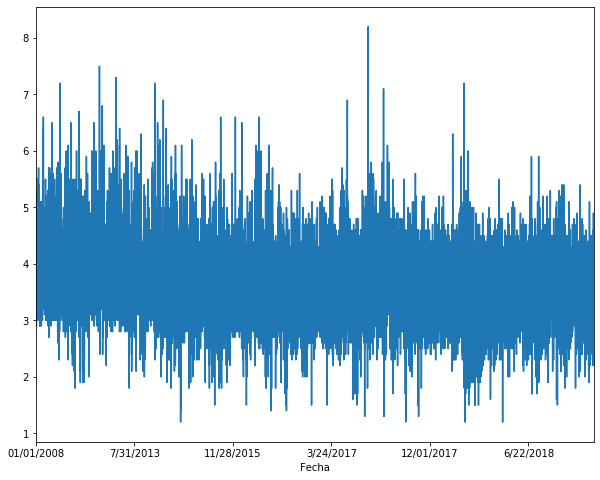

In [3]:
data.plot(figsize=(10,8),legend=False);

### Cargamos el archivo histórico de sismos en México de los último año del cual se tiene registro que es el 2018, para poder hacer la comparativa con la simulación que vamos a realizar mas adelante.

In [4]:
file_name = 'JALISCO 2018.csv'
data8 = pd.read_csv(file_name, index_col=0)
data8

,3.6
01/01/2018,
01/01/2018,3.9
01/01/2018,3.5
01/01/2018,3.1
01/01/2018,3.7
01/01/2018,3.6
01/01/2018,4.0
01/01/2018,3.7
01/01/2018,4.2
01/01/2018,3.8


### Gráfica por magnitudes de 1 año tomando como base 2018

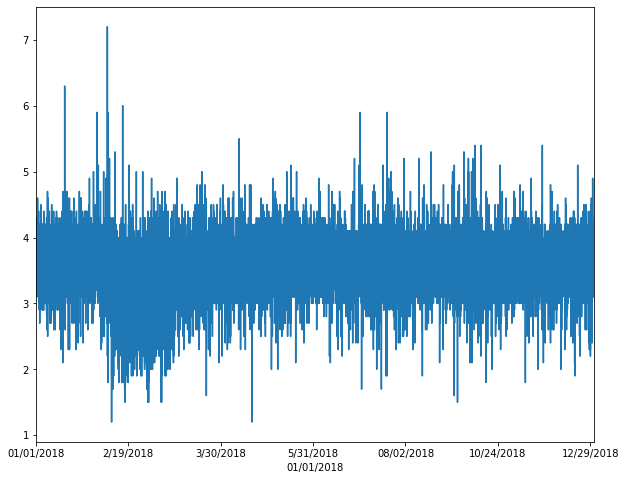

In [5]:
data8.plot(figsize=(10,8),legend=False);

###  Media y desviación estándar en base a los sismos registrados en el último año - 2018

In [6]:
mu = data8.iloc[:,0].mean()
sigma = data8.iloc[:,0].std()
mu,sigma

(3.5466779279279352, 0.38386639580693044)

In [7]:
def sis_sim(mu,sigma,ndays,nscen,start_date):
    dates = pd.date_range(start = start_date,periods=ndays)
    rend_sim = sigma*np.random.randn(ndays,nscen) + mu
    return pd.DataFrame(index = dates, data = rend_sim)

# Simulamos 100 escenarios para todo el 2019

In [8]:
rend_sim = sis_sim(mu,sigma,365,100,"2019-01-01")
rend_sim

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2019-01-01,4.028909,3.788429,3.732648,3.464476,3.524317,3.712312,3.569552,3.351138,3.417607,3.139104,...,3.611923,3.643270,2.706614,3.261699,4.007510,3.989501,3.773196,4.012887,3.156437,4.116758
2019-01-02,4.028078,3.324441,4.175301,3.867419,3.961464,2.758170,3.736205,2.988913,3.502200,3.292114,...,3.325142,3.812544,3.474265,3.221524,3.148124,3.523531,3.339495,3.418033,3.805085,3.907745
2019-01-03,4.177655,3.786570,3.665236,3.995509,3.833036,4.017340,3.532579,3.269711,3.678389,3.425220,...,3.600411,3.867334,3.829744,3.867088,3.366538,3.565415,2.722547,3.755989,3.844551,3.488188
2019-01-04,3.245953,3.046237,2.742737,3.618196,2.774501,3.913181,3.892580,3.378600,3.066331,3.932997,...,3.776602,3.433141,4.265616,3.541879,4.021840,3.624733,3.728808,2.907511,3.743159,3.231700
2019-01-05,3.311188,4.189453,3.774380,3.582465,4.696250,3.192564,2.445743,3.901540,3.696906,3.526614,...,3.271815,4.185672,3.509550,3.075151,3.267945,4.003388,3.777184,3.534364,3.419728,4.104858
2019-01-06,3.531808,3.675178,3.674105,4.358725,4.436463,3.280436,3.611990,3.799082,3.259700,3.750576,...,3.916767,3.429642,3.336168,2.697835,3.962146,3.243090,3.756687,3.133803,3.479869,3.597426
2019-01-07,3.679113,3.664679,3.714962,3.219586,3.220139,3.917043,3.309940,4.601684,3.019170,4.008792,...,3.554669,3.929398,4.226217,3.340865,3.950120,3.604502,3.212950,3.159747,3.565649,4.095420
2019-01-08,2.705786,3.564476,3.363302,3.231356,3.797217,3.356379,3.776807,3.007339,4.316249,3.875486,...,3.897895,3.791025,2.930071,3.774428,3.392069,3.402682,3.001213,3.501346,3.605343,4.048142
2019-01-09,2.933364,3.432443,3.469850,4.040884,3.580985,3.484238,3.860297,3.492461,3.687495,3.168397,...,3.226477,2.999055,3.422874,3.192448,3.226874,3.693785,3.166177,3.206838,3.133494,4.063285
2019-01-10,3.477933,4.258626,3.632627,3.609474,3.357336,3.507676,3.118430,4.259922,3.947925,3.382800,...,3.098124,3.225748,3.908430,2.898302,3.623704,3.742493,3.743226,3.214382,3.854102,3.337689


### Gráfica de los 100 escenarios simulados

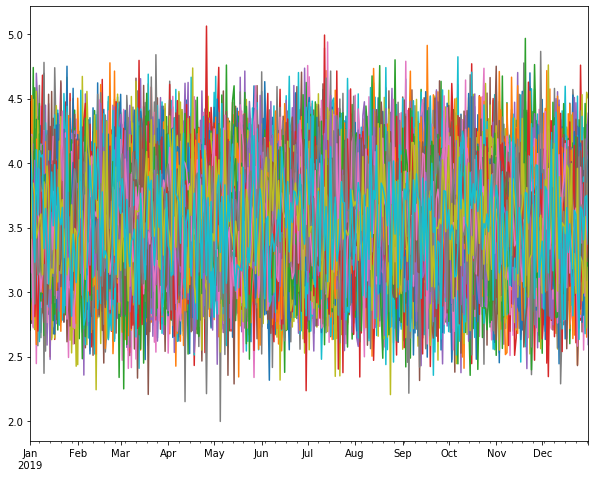

In [9]:
rend_sim.plot(figsize=(10,8),legend=False);

### Hacemos una nueva corrida con 3 escenarios para la simulación del 2019 y poder apreciar mejor la comparativa entre los datos historicos y la simulación.

In [10]:
rend_sim1 = sis_sim(mu,sigma,365,3,"2019-01-01")
rend_sim1

,0,1,2
2019-01-01,3.900087,3.258383,3.590325
2019-01-02,3.146217,3.744633,3.140763
2019-01-03,3.041519,3.475711,3.490580
2019-01-04,3.983298,3.300234,3.972984
2019-01-05,3.572535,3.679631,4.059325
2019-01-06,3.982441,3.217537,2.715055
2019-01-07,3.698202,3.557466,3.545496
2019-01-08,3.358268,4.241288,3.133082
2019-01-09,3.877592,4.005416,3.551411
2019-01-10,3.469446,3.933348,3.451369


## Gráficas comparativas simulación (2019) vs historial de un año (2018)

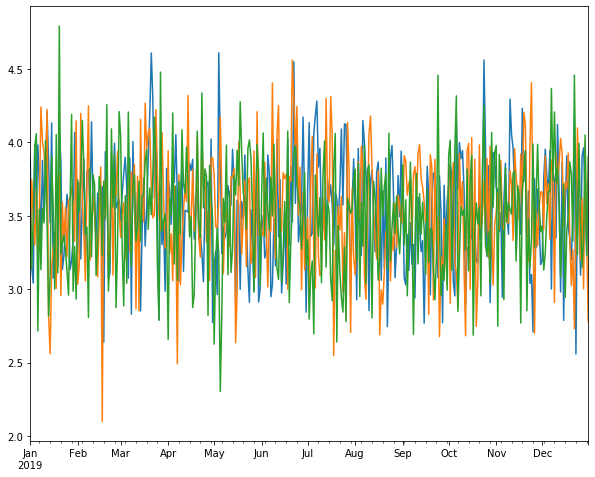

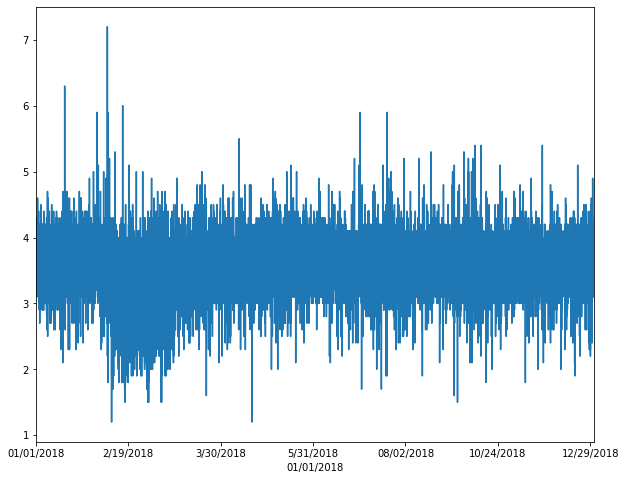

In [11]:
rend_sim1.plot(figsize=(10,8),legend=False),data8.plot(figsize=(10,8),legend=False);

## Conclusión

- Es importante recalcar que los sismos dependen de muchos factores pues se debe de tomar en cuenta no solo el movimiento de las placas tectónicas, si que en su varianza de magnitud entran rasgos como población por km^2 y a su vez vibraciones externas como la es de maquinaria, fábricas, automóviles, etc.
- Con esto logramos definir una estimación en relación a los datos históricos, y con ellos poder tomar precauciones, es por ello que dia a dia se generan nuevos metodos de construccion para evitar daños con los posibles sismos, y evitar la pérdida de vidas humanas y daños terceros.
